In [2]:
!pip install dtreeviz

     |████████████████████████████████| 60 kB 5.5 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66636 sha256=b3c55014301c56d14d02b895de3e4d1f29ecbb85e30c8372f98fbd8ed1a7eacd
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz


In [3]:
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn import tree

from io import StringIO
from ipywidgets import Image
from dtreeviz.trees import *

In [4]:
iris = load_iris()
boston = load_boston()

In [5]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

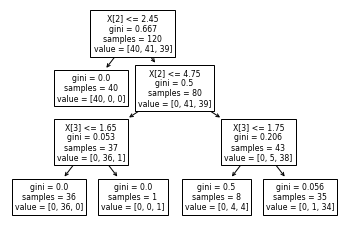

In [6]:
tree.plot_tree(clf);

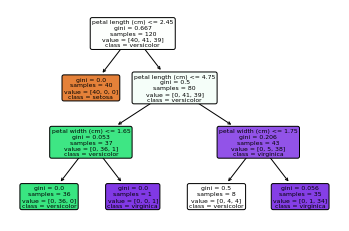

In [7]:
tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               rounded=True, 
               filled = True);

In [8]:
tree_dot = StringIO()
tree.export_graphviz(clf, 
                     out_file=tree_dot,
                     feature_names = iris.feature_names, 
                     class_names=iris.target_names, 
                     rounded=True,
                     filled=True, 
                     proportion=True, 
                     precision=2)
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())
Image(value=tree_graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x99\x00\x00\x02A\x08\x02\x00\x00\x00C.\xe6\x87\x…

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


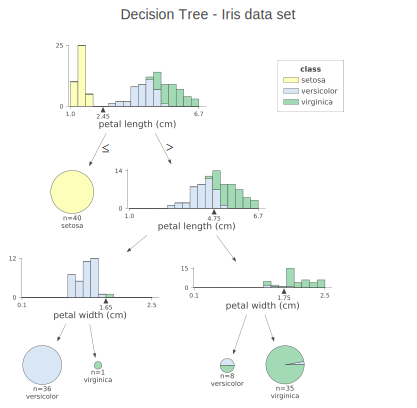

In [9]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set")
viz

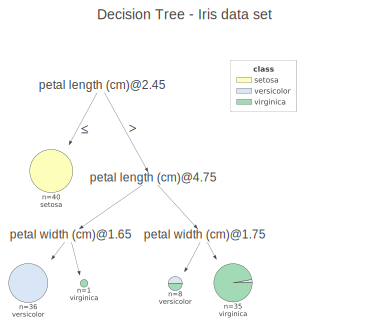

In [10]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set",
               fancy=False)
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


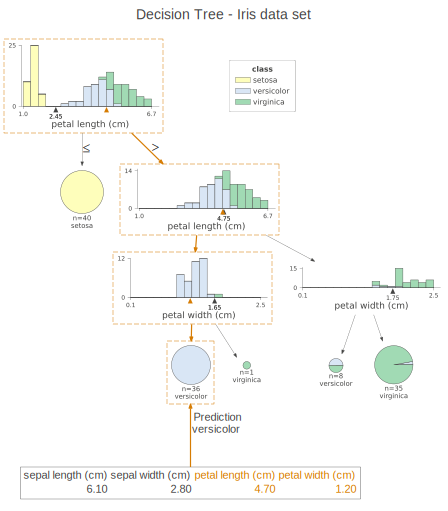

In [11]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names),
               title="Decision Tree - Iris data set",
               #orientation="LR", 
               X=X_test[0])  
viz

In [12]:
print(explain_prediction_path(clf, X_test[0], feature_names=iris.feature_names, explanation_type="plain_english"))

2.45 <= petal length (cm)  < 4.75
petal width (cm) < 1.65



Regression

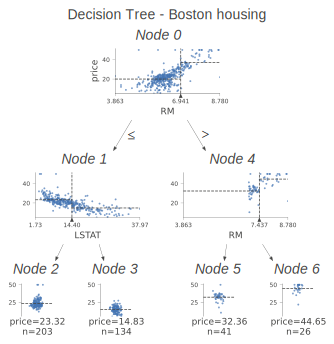

In [13]:
# prepare the data
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fir the regressor
reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='price',
               feature_names=boston.feature_names,
               title="Decision Tree - Boston housing",
               show_node_labels = True)
viz

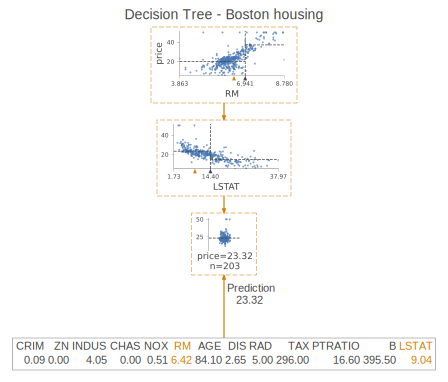

In [14]:
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='price',
               feature_names=boston.feature_names,
               title="Decision Tree - Boston housing",
               X=X_test[0], 
               show_just_path=True)
              
viz